<a href="https://colab.research.google.com/github/gromdimon/code/blob/main/Bioprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Bioactivity project***


# **Finding data**

# Installing libraries

In [ ]:
! pip install chembl_webresource_client

     |████████████████████████████████| 61kB 2.1MB/s 
     |████████████████████████████████| 51kB 3.4MB/s 
     |████████████████████████████████| 645kB 5.2MB/s 
ERROR: lazypredict 0.2.9 has requirement PyYAML==5.3.1, but you'll have pyyaml 5.4.1 which is incompatible.
ERROR: flask 1.1.4 has requirement itsdangerous<2.0,>=0.24, but you'll have itsdangerous 2.0.1 which is incompatible.
  Found existing installation: PyYAML 5.3.1
    Uninstalling PyYAML-5.3.1:
      Successfully uninstalled PyYAML-5.3.1
  Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0


# Importing libraries

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

# Searching target protein

In [ ]:
target = new_client.target
target_query = target.search('Beta amyloid A4 protein')
targets = pd.DataFrame.from_dict(target_query)
targets

# We chose one protein as selected_target

In [ ]:
selected_target = targets.target_chembl_id[2]
selected_target

'CHEMBL2487'

# Now we will see bioactivity of CHEMBL2487

In [ ]:
activity = new_client.activity
chemble_activity = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
act = pd.DataFrame.from_dict(chemble_activity)
act

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '17.02', 'le': '0.34', 'lle': '1.98', ...",CHEMBL311039,None,CHEMBL311039,5.30,False,http://www.openphacts.org/units/Nanomolar,132837,=,1,True,=,None,IC50,nM,None,5000.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '18.60', 'le': '0.40', 'lle': '2.33', ...",CHEMBL450926,None,CHEMBL450926,5.57,False,http://www.openphacts.org/units/Nanomolar,132839,=,1,True,=,None,IC50,nM,None,2700.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '18.45', 'le': '0.37', 'lle': '2.42', ...",CHEMBL310242,None,CHEMBL310242,5.75,False,http://www.openphacts.org/units/Nanomolar,132841,=,1,True,=,None,IC50,nM,None,1800.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '15.12', 'le': '0.32', 'lle': '1.13', ...",CHEMBL74874,None,CHEMBL74874,4.96,False,http://www.openphacts.org/units/Nanomolar,132840,=,1,True,=,None,IC50,nM,None,11000.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '13.43', 'le': '0.33', 'lle': '1.06', ...",CHEMBL75183,None,CHEMBL75183,5.00,False,http://www.openphacts.org/units/Nanomolar,132838,=,1,True,=,None,IC50,nM,None,10000.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Not Active,20120045,[],CHEMBL4510291,APP40 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,None,None,CHEMBL4507288,None,NaN,"{'bei': '10.18', 'le': '0.21', 'lle': '-0.42',...",CHEMBL4558518,None,CHEMBL4558518,5.80,False,http://www.openphacts.org/units/Nanomolar,3359706,=,54,True,=,None,IC50,nM,None,1600.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,1600.0
1230,Active,20120642,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4510293,APP42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,single protein format,C

In [ ]:
act.standard_type.unique()

array(['IC50'], dtype=object)

# Saving this bioactivity data as csv file

In [ ]:
act.to_csv('Beta_amyloid_bioactivity_data.csv', index=False)

# Making our data clearer

In [ ]:
act_normal = act[act.standard_value.notna()]
act_normal = act_normal[act_normal.canonical_smiles.notna()]
act_normal = act_normal.drop_duplicates(['canonical_smiles'])
act_normal

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '17.02', 'le': '0.34', 'lle': '1.98', ...",CHEMBL311039,None,CHEMBL311039,5.30,False,http://www.openphacts.org/units/Nanomolar,132837,=,1,True,=,None,IC50,nM,None,5000.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '18.60', 'le': '0.40', 'lle': '2.33', ...",CHEMBL450926,None,CHEMBL450926,5.57,False,http://www.openphacts.org/units/Nanomolar,132839,=,1,True,=,None,IC50,nM,None,2700.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '18.45', 'le': '0.37', 'lle': '2.42', ...",CHEMBL310242,None,CHEMBL310242,5.75,False,http://www.openphacts.org/units/Nanomolar,132841,=,1,True,=,None,IC50,nM,None,1800.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '15.12', 'le': '0.32', 'lle': '1.13', ...",CHEMBL74874,None,CHEMBL74874,4.96,False,http://www.openphacts.org/units/Nanomolar,132840,=,1,True,=,None,IC50,nM,None,11000.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,cell-based format,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,None,None,CHEMBL1133739,J. Med. Chem.,2000.0,"{'bei': '13.43', 'le': '0.33', 'lle': '1.06', ...",CHEMBL75183,None,CHEMBL75183,5.00,False,http://www.openphacts.org/units/Nanomolar,132838,=,1,True,=,None,IC50,nM,None,10000.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,None,19258715,[],CHEMBL4403499,Inhibition of beta amyloid in human SH-SY5Y cells,B,None,None,BAO_0000190,BAO_0000219,cell-based format,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,Outside typical range,Values for this activity type are unusually la...,CHEMBL4402535,Eur J Med Chem,2019.0,None,CHEMBL6246,ELLAGIC ACID,CHEMBL6246,None,False,http://www.openphacts.org/units/Nanomolar,3215485,=,1,True,=,None,IC50,nM,None,300000.0,CHEMBL2487,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,300.0
1226,Active,20120042,[],CHEMBL4510290,APP42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=S(=O)(NC

# Making a new Dataframe

In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
new_act = act_normal[selection]
new_act

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1224,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,300000.0
1226,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5
1229,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0
1230,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0


# Saving this Dataframe to csv file

In [ ]:
new_act.to_csv('Beta_amyloid_bioactivity_clear', index=False)

# Making new column

In [ ]:
# This is temporary line
# new_act = pd.read_csv('Beta_amyloid_bioactivity_clear.csv')

In [ ]:
bioactivity_threshold = []
for i in new_act.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append('inactive')
  elif float(i) <= 1000:
    bioactivity_threshold.append('active')
  else:
    bioactivity_threshold.append('intermediate')
bioactivity_class = pd.Series(bioactivity_threshold, name = 'bioactivity_class')
act5 = pd.concat([new_act, bioactivity_class], axis=1)
act5

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
924,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,300000.0,inactive
925,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active
926,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate
927,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active


# Deleting NaN data

In [ ]:
act5 = act5.dropna()
act5

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
924,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,300000.0,inactive
925,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active
926,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate
927,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active


# Saving to csv

In [ ]:
act5.to_csv('bioactivity_with_class.csv', index=False)

# **Calculating Lipinski descriptor**

# Installing conda and rdkid

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-07-06 21:07:29--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   162MB/s    in 0.5s    

2021-07-06 21:07:30 (162 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / - 

# Preparing canonical smiles

In [ ]:
act_nosmiles = act_5.drop(columns='canonical_smiles')
smiles = []

for i in act_5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')
act_clean_smiles = pd.concat([act_nosmiles,smiles], axis=1)
act_clean_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL311039,5000.0,intermediate,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CHEMBL450926,2700.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CHEMBL310242,1800.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CHEMBL74874,11000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CHEMBL75183,10000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...,...,...,...
924,CHEMBL6246,300000.0,inactive,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23
925,CHEMBL1091513,0.5,active,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...
926,CHEMBL4558518,1600.0,intermediate,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...
927,CHEMBL3609637,31.0,active,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...


# Calculating descriptor

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose = False):
  moldata = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)

  basedata = np.arange(1,1)
  i = 0
  for mol in moldata:
    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
    row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

    if (i==0):
      basedata = row
    else:
      basedata = np.vstack([basedata, row])
    i += 1
  columnNames = ['MW', 'LogP', 'NumHDon', 'NumHAcc']   
  descriptors = pd.DataFrame(data = basedata, columns = columnNames)

  return descriptors

In [ ]:
act_lipinski = lipinski(act_clean_smiles.canonical_smiles)
act_lipinski

,MW,LogP,NumHDon,NumHAcc
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
924,302.194,1.31280,4.0,8.0
925,517.925,4.66920,1.0,4.0
926,569.114,6.21910,1.0,5.0
927,514.483,4.66972,0.0,7.0


In [ ]:
act_comb = pd.concat([act_5, act_lipinski], axis = 1)
act_comb

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDon,NumHAcc
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.31880,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.24120,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.31880,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0
...,...,...,...,...,...,...,...,...
924,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,300000.0,inactive,302.194,1.31280,4.0,8.0
925,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active,517.925,4.66920,1.0,4.0
926,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate,569.114,6.21910,1.0,5.0
927,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active,514.483,4.66972,0.0,7.0


# Normalising standart values

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
act_norm = norm_value(act_comb)
act_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDon,NumHAcc,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
924,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,inactive,302.194,1.31280,4.0,8.0,300000.0
925,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,517.925,4.66920,1.0,4.0,0.5
926,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,intermediate,569.114,6.21910,1.0,5.0,1600.0
927,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,514.483,4.66972,0.0,7.0,31.0


# Converting IC50 to pIC50

In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
act_final = pIC50(act_norm)
act_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDon,NumHAcc,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
924,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,inactive,302.194,1.31280,4.0,8.0,3.522879
925,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,517.925,4.66920,1.0,4.0,9.301030
926,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,intermediate,569.114,6.21910,1.0,5.0,5.795880
927,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,514.483,4.66972,0.0,7.0,7.508638


# Saving act_final

In [ ]:
act_final.to_csv('bioactvity_pIC50.csv')

# Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [ ]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

In [ ]:
act_fn = act_final[act_final['bioactivity_class'] != 'intermediate']
act_fn

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDon,NumHAcc,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.68080,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
923,CHEMBL4453548,CCOC(=O)c1cnc2ccccc2c1N1CCN(CC(=O)Nc2n[nH]c3nc...,inactive,459.510,2.44350,2.0,8.0,4.803547
924,CHEMBL6246,O=c1oc2c(O)c(O)cc3c(=O)oc4c(O)c(O)cc1c4c23,inactive,302.194,1.31280,4.0,8.0,3.522879
925,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,517.925,4.66920,1.0,4.0,9.301030
927,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,514.483,4.66972,0.0,7.0,7.508638


# Frequency of 2 classes

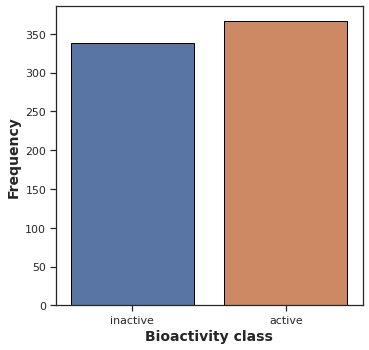

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=act_fn, edgecolor='black')
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('plot_bioactivity_class.pdf')

# Making statistical analysis

In [ ]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = act_fn[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = act_fn[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

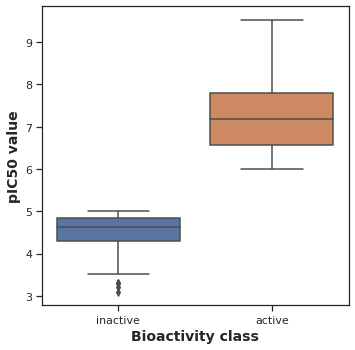

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = act_fn)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,5.584881e-117,0.05,Different distribution (reject H0)


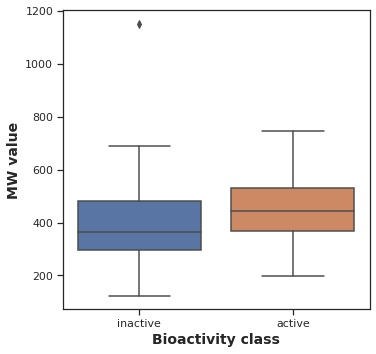

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = act_fn)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW value', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,45983.5,1.450446e-09,0.05,Different distribution (reject H0)


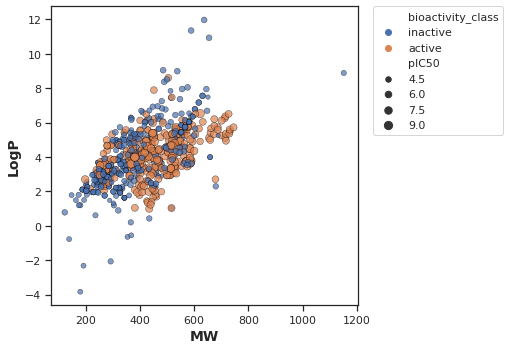

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=act_fn, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

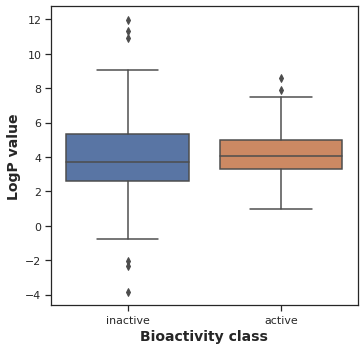

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = act_fn)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP value', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,56685.0,0.024091,0.05,Different distribution (reject H0)


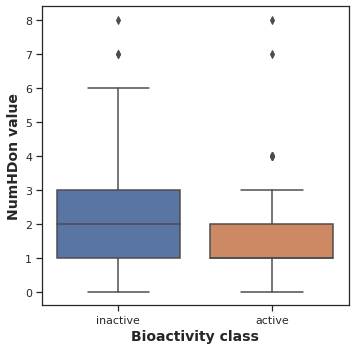

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDon', data = act_fn)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDon value', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDon.pdf')

In [ ]:
mannwhitney('NumHDon')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDon,46163.0,5.990960e-10,0.05,Different distribution (reject H0)


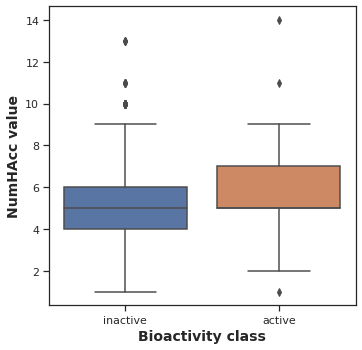

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcc', data = act_fn)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcc value', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcc.pdf')

In [ ]:
mannwhitney('NumHAcc')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcc,49469.5,0.000001,0.05,Different distribution (reject H0)


# Interpretation of Results
All of the four Lipinski descriptors exhibited statistically significant difference between active and inactive molecules.


# Now we will calculate other descriptors

In [ ]:
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! wget https://github.com/gromdimon/features/raw/main/padel.sh
! wget https://github.com/gromdimon/features/raw/main/padel.zip

--2021-07-14 07:13:03--  https://github.com/gromdimon/features/raw/main/padel.sh
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gromdimon/features/main/padel.sh [following]
--2021-07-14 07:13:04--  https://raw.githubusercontent.com/gromdimon/features/main/padel.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231 [text/plain]
Saving to: ‘padel.sh’

padel.sh            100%[===================>]     231  --.-KB/s    in 0s      

2021-07-14 07:13:04 (9.77 MB/s) - ‘padel.sh’ saved [231/231]

--2021-07-14 07:13:04--  https://github.com/gromdimon/features/raw/main/padel.zip
Resolving github.com (g

In [ ]:
! unzip padel.zip

In [ ]:
import pandas as pd

In [ ]:
#act_final = pd.read_csv('bioactvity_pIC50.csv')
act_final

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDon,NumHAcc,pIC50
0,0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.42,3.32,1.00,2.00,5.30
1,1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.46,3.24,1.00,3.00,5.57
2,2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.42,3.32,1.00,2.00,5.74
3,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.88,3.83,1.00,2.00,4.96
4,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.33,3.94,1.00,2.00,5.00
...,...,...,...,...,...,...,...,...,...
723,723,CHEMBL4070599,COc1ccccc1/C=C/c1cc(=O)c(O)c[nH]1,intermediate,243.26,2.26,2.00,3.00,4.78
724,724,CHEMBL4086825,COc1ccccc1/C=C/c1cc(=O)c(O)cn1C,inactive,257.29,2.27,1.00,4.00,4.90
725,725,CHEMBL4074006,O=c1cc(/C=C/c2ccc(O)cc2)[nH]cc1O,inactive,229.24,1.96,3.00,3.00,4.97
726,726,CHEMBL4068105,Cn1cc(O)c(=O)cc1/C=C/c1ccc(O)cc1,inactive,243.26,1.97,2.00,4.00,4.81


In [ ]:
selection = ['canonical_smiles', 'molecule_chembl_id']
act_selected = act_final[selection]
act_selected.to_csv('molecule.smi', sep='\t', index=False, header=False )

In [ ]:
! cat molecule.smi | head -5

CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1	CHEMBL311039
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1	CHEMBL450926
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1	CHEMBL310242
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1	CHEMBL74874
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1	CHEMBL75183


In [ ]:
! cat molecule.smi | wc -l

728


In [ ]:
! cat padel.sh.1







<!DOCTYPE html>
<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">



  <link crossorigin="anonymous" media="all" integrity="sha512-J/5cWm5rrVuxkSgldaK1emf5j30Bs5mRgu0uhuHrG+iwf9mD2LOrkQ32SyN5PADLWzkSDxLS3bW/ScsiM44wzw==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-27fe5c5a6e6bad5bb191282575a2b57a.css" />
  
    <link crossorigin="anonymous" media="all" integrity="sha512-W0Cb3tYIxIb58LtOmiY++k5siW1IkzkqaHOXMJpsrZBWMGoaw8M3r5f7RRxa1heGJEDanaTJmAqCJUoMytKNxA==" rel="stylesheet" href="https://github.githubassets.com/assets/behaviors-5b409bded608c486f9f0bb4e9a263efa.css" />
    
    
    
    <link

In [ ]:
! bash padel.sh.1

padel.sh.1: line 7: syntax error near unexpected token `newline'
padel.sh.1: line 7: `<!DOCTYPE html>'


In [ ]:
! ls -l

total 3424
-rw-r--r-- 1 root root 1296882 Jul 14 04:54 actx.csv
-rw-r--r-- 1 root root   15363 Jul 14 04:52 acty.csv
-rw-r--r-- 1 root root  105346 Jul 14 04:45 bioactvity_pIC50.csv
-rw-r--r-- 1 root root 1306639 Jul 14 05:58 dataset_with_padel_pIC50.csv
drwxr-xr-x 3 root root    4096 Jul 14 04:48 __MACOSX
-rw-r--r-- 1 root root   52599 Jul 14 07:11 molecule.smi
drwxrwxr-x 4 root root    4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root  118035 Jul 14 06:56 padel.sh
-rw-r--r-- 1 root root  118020 Jul 14 07:09 padel.sh.1
-rw-r--r-- 1 root root  118035 Jul 14 07:11 padel.sh.2
-rw-r--r-- 1 root root  115318 Jul 14 06:56 padel.zip
-rw-r--r-- 1 root root  110780 Jul 14 07:09 padel.zip.1
-rw-r--r-- 1 root root  115312 Jul 14 07:11 padel.zip.2
drwxr-xr-x 1 root root    4096 Jul  1 13:42 sample_data


# Preparing data for later researchs

In [ ]:
actx = pd.read_csv('descriptors_output.csv')
actx

FileNotFoundError: ignored

In [ ]:
actx = actx.drop(columns='Name')
actx


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
724,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
725,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
726,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
actx.to_csv('actx.csv')

In [ ]:
acty = act_final['pIC50']
acty

0     5.30
1     5.57
2     5.74
3     4.96
4     5.00
      ... 
723   4.78
724   4.90
725   4.97
726   4.81
727   4.66
Name: pIC50, Length: 728, dtype: float64

In [ ]:
acty.to_csv('acty.csv')

# Making new Dataset

In [ ]:
datasetxy = pd.concat([actx, acty], axis=1)
datasetxy

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.30
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.57
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.74
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.96
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.78
724,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.90
725,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.97
726,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.81


In [ ]:
datasetxy.to_csv('dataset_with_padel_pIC50.csv', index=False)

# Compare ML algorithms

In [1]:
! pip install lazypredict

     |████████████████████████████████| 25.9 MB 950 bytes/s 
     |████████████████████████████████| 302 kB 63.5 MB/s 
     |████████████████████████████████| 14.5 MB 8.0 kB/s 
     |████████████████████████████████| 269 kB 28.0 MB/s 
     |████████████████████████████████| 6.8 MB 43.7 MB/s 
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 127.6 MB 7.0 kB/s 
     |████████████████████████████████| 10.1 MB 22.1 MB/s 
     |████████████████████████████████| 248 kB 72.6 MB/s 
     |████████████████████████████████| 1.2 MB 27.5 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=5664b15475ea57cc06dc5d5a8054ff2c529c4f0f91d015c1bbe84ecd5a9af847
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successful

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# Importing data
data = pd.read_csv('dataset_with_padel_pIC50.csv')

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
724,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
725,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
726,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Feature for proving and Proving our data
def check_missing_values(dataframe):
    
    if dataframe.isnull().sum().sum() > 0:
        m_total = dataframe.isnull().sum().sort_values(ascending=False) 
        total = m_total[m_total > 0]

        m_percent = dataframe.isnull().mean().sort_values(ascending=False) 
        percent = m_percent[m_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')
        
        
check_missing_values(dataframe=data)

Total and Percentage of NaN:
        Total  Percent
pIC50      1     0.00


In [12]:
# Remove NaN
data = data.dropna()

In [13]:
# Making X and Y column
X = data.drop(columns='pIC50')
Y = data.pIC50

In [14]:
print(X.shape)
print(Y.shape)

(727, 881)
(727,)


In [16]:
# Remove low variance indicators
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X = X.astype('int32')
X.shape

(727, 183)

In [20]:
# Spliting data in 80\20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

In [21]:
# Seeing the data that was prepared
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((581, 183), (581,), (146, 183), (146,))

In [29]:
# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 42/42 [00:21<00:00,  1.99it/s]


In [30]:
# Performance table of the training set (80% subset)
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.95,0.96,0.26,0.06
ExtraTreeRegressor,0.95,0.96,0.26,0.04
ExtraTreesRegressor,0.95,0.96,0.26,1.24
GaussianProcessRegressor,0.95,0.96,0.26,0.17
XGBRegressor,0.95,0.96,0.27,0.50
RandomForestRegressor,0.90,0.93,0.37,1.05
MLPRegressor,0.90,0.93,0.37,1.14
BaggingRegressor,0.88,0.92,0.40,0.14
HistGradientBoostingRegressor,0.85,0.90,0.44,1.59


In [42]:
# Checking the study on a test sample
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = reg.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:20<00:00,  2.06it/s]


In [43]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,81446648871981272748036985172445992631402496.00,-21344639014726127061010533256904833897594880.00,6401354030157185155072.00,0.20
RANSACRegressor,792145756549870019149824.00,-207596818957896951791616.00,631302903589.13,1.24
TransformedTargetRegressor,558787424287703564288.00,-146440842227122307072.00,16767122935.59,0.03
LinearRegression,558787424287703564288.00,-146440842227122307072.00,16767122935.59,0.06
KernelRidge,75.85,-18.62,6.14,0.08
GaussianProcessRegressor,52.08,-12.39,5.07,0.16
LassoLars,4.85,-0.01,1.39,0.03
DummyRegressor,4.85,-0.01,1.39,0.05
ElasticNet,4.85,-0.01,1.39,0.04


In [ ]:
# Now we can see, that train and test models are different. That can have at least 2 causes:
# 1. I use in a wrong way Lazypredict.
# 2. I have too small data to make a normal research.
# As i saw work of lazypredict on some other datasets, I can assume that i have too few data...
# But we will go further anyway

# Making ML model using RandomForest

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
X_train = X_train.astype('int32')
Y_train = Y_train.astype('float64')

In [47]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6379385119872925

In [48]:
# Try data with test sample

Y_pred = model.predict(X_test)
print(Y_pred)

[5.63787688 8.21859418 4.30949288 6.15885004 7.04137672 3.92889725
 7.35758536 5.61345132 4.86515842 6.77849206 7.28104007 7.01697136
 5.38330929 5.67638109 6.41907476 5.88873913 5.74144822 6.70778481
 4.65881865 7.42574592 7.34593214 5.55945248 7.55944465 5.61577738
 7.98992514 5.83097985 7.31911197 4.11089701 4.70621275 4.40532455
 5.25950503 4.962661   5.60395207 7.51170771 5.63716716 5.34761982
 5.88031745 4.87419266 4.79387585 7.73508506 4.84309006 6.88701864
 8.48970448 4.86329038 5.87405283 7.37964141 6.92450351 4.95971024
 4.82221404 6.94132778 5.84391717 6.05828669 6.24357037 4.55690599
 5.12668537 7.01404797 4.85420864 5.08889757 7.2476286  8.03700224
 7.11357987 8.27521331 6.46684698 6.44633571 5.27491691 7.98992514
 4.67160056 4.98588401 4.12802236 7.21219563 4.27006718 5.62259865
 7.60587045 5.72737272 6.95799652 6.32751383 7.80223516 4.87640066
 4.67049524 6.16513843 5.74144822 6.00855268 7.61070026 6.81487892
 7.23491897 5.83097985 7.01404797 6.00722491 6.13771152 7.6107

# Evaluate model performance

In [50]:
# Calculate the absolute errors

errors = abs(Y_pred - Y_test)
print('Mean absolute errors:', round(np.mean(errors), 2), 'degrees.')

Mean absolute errors: 0.59 degrees.


In [51]:
# Calculate percentage of errors
mape = 100 * (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 89.97 %.


# Prediction for new drug

In [52]:
# Only for trying, this are random numbers
drug = np.random.randint(0,2,183)
#drug = pd.read_csv('...')
pred = model.predict([drug])
print("pIC50 prediction", pred)

pIC50 prediction [5.71772134]
